<center><h1>Chen_PoHao_HW6</h1></center>

Name: Po Hao Chen
<br>
Github Username: pohaoc29
<br>
USC ID: 4213309111

## 1. Tree-Based Methods

Import packages

In [1]:
import os,sys
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### (a) Download the APS Failure data

In [2]:
train_df = pd.read_csv('../data/aps+failure+at+scania+trucks/aps_failure_training_set.csv',skiprows=20)
train_df # 60,000 rows, 171 columns, 1,000 pos class

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [3]:
test_df = pd.read_csv('../data/aps+failure+at+scania+trucks/aps_failure_test_set.csv',skiprows=20)
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

The Data imputation methods:
1. **Remove the missing data**: the simplest way but it might miss a lot of information of the whole data and if the percentage of the missing values is high, it would work poorly because most of the data are removed.

2. **Statistics imputation**: Statistics: Missing values are replaced with the statistics such as **mean, median, mode(most frequent value), maximum, or minimum** of the observed values for the feature/column. Because the statistics are the best guess of the model. This technique is the most common way of data imputatuion. It is simple and quick but may not be suitable for variables with skewed distributions.

3. **Constant value imputation**: Using a constant value can has a meaning within the domain, such as 0, distinct from all other values. This work for categorical features. For example, there is a Color class, inside the class has { Red, Yellow, Green, Blue, and some missing values}, we can let those missing value be the one of the category called <b>Missing</b>, then the Color class after imputaiton would be { Red, Yellow, Green, Blue, <b>Missing</b>}

4. <b>Random selected observation imputation</b>: A feature value from another randomly selected observation.

5. **Model imputation: Using a value estimated by another predictive model**
    - Treat the missing value as the output of the predictive model
    - Predict it based on other data points that do not have missing values
    - Usually use the simple model, such as **KNN regression and classification** or **Linear regression**
  
6. **Model imputation using iterative method (5's advanced)**: Used when there are a lot of data has missing value, and there would not be enough data without missing value for the predictive model( in 5.) to predict the missing value.
    - Based on Expectation Maximization
    - First, impute all missing values randomly or using mean or median
    - Predict missing values using other data points
    - Updata all missing values and iterate


#### Reminder: Always split the data into training and test sets before any imputation. This ensures that the imputation process is consistent between the training and test datasets and that the test dataset remains entirely unseen during the imputation step.
#### But now it is data exploration phase so I concat both train and test set to do the following question. And at the training phase(1.(c)~), I will replace missing values in both the training and test datasets with the mean values computed from the training data.

#### Mean imputation

In [4]:
df = pd.concat([train_df, test_df])
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [5]:
avg_list = list()

for i in train_df.columns.drop(['class']):
    column_sum = 0.0
    notNA_length = 0
    do_column = train_df[i]
    for j in range(len(do_column)):
        if(do_column[j] != 'na'):
            column_sum += float(do_column[j])
            notNA_length += 1
    avg = column_sum/notNA_length
    df[i] = df[i].replace(['na'],[avg])

df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0.713189,0,190620.639314,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,0.713189,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,0.713189,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.713189,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,0.713189,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,0.713189,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [6]:
df.iloc[:,1:] = df.iloc[:,1:].astype(float)

In [7]:
# positive=1; negative=0
df['class'] = df['class'].replace(['neg', 'pos'],[0,1])

#### (ii) Calculate the coefficient of variation

In [8]:
CV_table = pd.DataFrame(df.std()/df.mean(),columns=['CV']).drop(['class'])
pd.options.display.max_columns = None

CV_table.T

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
CV,4.328608,2.207351,2.167798,193.955307,22.282263,18.196998,91.351287,42.175077,17.648387,8.758654,5.476671,2.964655,2.352723,2.812592,6.275128,32.176826,2.31585,18.517977,43.153543,78.559993,9.115901,9.071049,2.254516,2.27639,3.086376,2.853898,10.565228,114.464381,23.192859,86.293581,5.73637,3.860192,40.987933,49.305161,38.356789,28.334262,33.025195,12.002267,3.022028,3.250151,3.944938,77.457761,9.020516,7.376191,12.05009,7.56604,2.838066,3.067089,8.705091,15.387103,22.403798,77.894525,2.688892,2.647885,2.887328,2.730377,2.641842,2.703677,2.997098,2.822276,6.705901,9.530023,2.410286,6.696208,5.086842,6.357414,7.058251,2.313777,2.625382,3.010957,3.580354,0.730117,0.732174,0.594487,0.516513,0.46146,0.425256,0.398499,0.382003,1.045765,4.321766,2.409046,2.409046,2.489485,2.44276,6.059501,0.901425,0.903091,2.505969,0.0,2.172496,194.438323,3.515949,57.870201,2.394247,11.195496,3.043851,12.256339,4.706754,28.016609,12.637275,6.765813,4.230072,2.641082,2.338008,3.04761,6.105679,9.789351,30.970185,194.089168,12.89984,2.409046,13.166659,1.972613,3.473147,5.126901,3.177477,4.749559,2.50361,2.099374,4.931903,57.295945,193.045035,6.151617,5.314985,1.65051,3.751946,27.530589,10.69904,25.270615,4.356755,1.621565,3.039165,4.228462,116.138172,35.154668,111.946396,11.235449,120.0849,36.222124,37.485432,34.527635,2.875632,2.1755,2.01028,21.145792,6.585016,2.290911,2.165908,2.798133,3.455001,5.104804,7.519559,49.145508,32.745722,4.548493,2.380027,2.253469,3.369784,3.235439,2.603882,2.573582,2.625732,2.858802,3.231533,4.885304,3.335353,5.754213,47.781107,45.71113


#### (iii) Plot a correlation matrix

In [9]:
corr_matrix = df.drop(['class'],axis=1).corr()
print(corr_matrix)

          aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
aa_000  1.000000  0.019562 -0.011690 -0.000472  0.025819  0.036032  0.011681   
ab_000  0.019562  1.000000 -0.010765  0.000076  0.025035  0.043458  0.000576   
ac_000 -0.011690 -0.010765  1.000000 -0.002125 -0.004769 -0.010612  0.015530   
ad_000 -0.000472  0.000076 -0.002125  1.000000 -0.000204 -0.000245 -0.000038   
ae_000  0.025819  0.025035 -0.004769 -0.000204  1.000000  0.829986 -0.000440   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.356969  0.013550 -0.018666 -0.000391  0.036649  0.046529  0.007631   
ee_008  0.259669  0.001869  0.010423 -0.000720 -0.008379 -0.010821  0.000067   
ee_009  0.133764  0.000198  0.017288 -0.000465 -0.006947 -0.008531 -0.001103   
ef_000  0.006754  0.046995 -0.006192 -0.000083  0.063587  0.093474 -0.000075   
eg_000  0.010299  0.075732  0.015826 -0.000094  0.030854  0.044368  0.000156   

          ag_001    ag_002    ag_003   

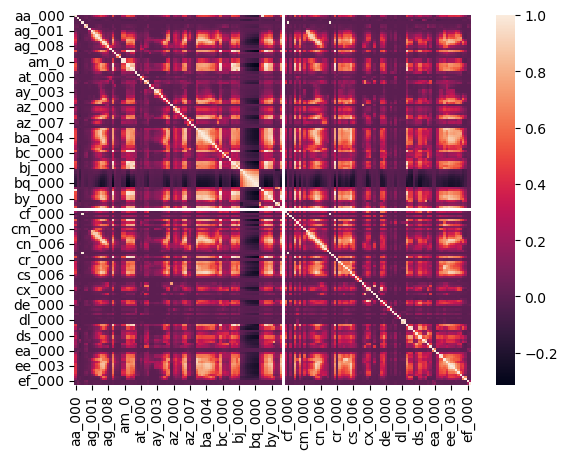

In [10]:
sns.heatmap(corr_matrix)
plt.show()

#### (iv) Make scatter plots and box plots

In [11]:
CV_table['CV'] = CV_table['CV'].astype(float)
highest_CV = CV_table['CV'].nlargest(math.floor(math.sqrt(170)))
highest_CV

cf_000    194.438323
co_000    194.089168
ad_000    193.955307
cs_009    193.045035
dj_000    120.084900
df_000    116.138172
as_000    114.464381
dh_000    111.946396
ag_000     91.351287
au_000     86.293581
ak_000     78.559993
az_009     77.894525
ay_009     77.457761
Name: CV, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'cf_000'),
  Text(1, 0, 'co_000'),
  Text(2, 0, 'ad_000'),
  Text(3, 0, 'cs_009'),
  Text(4, 0, 'dj_000'),
  Text(5, 0, 'df_000'),
  Text(6, 0, 'as_000'),
  Text(7, 0, 'dh_000'),
  Text(8, 0, 'ag_000'),
  Text(9, 0, 'au_000'),
  Text(10, 0, 'ak_000'),
  Text(11, 0, 'az_009'),
  Text(12, 0, 'ay_009')])

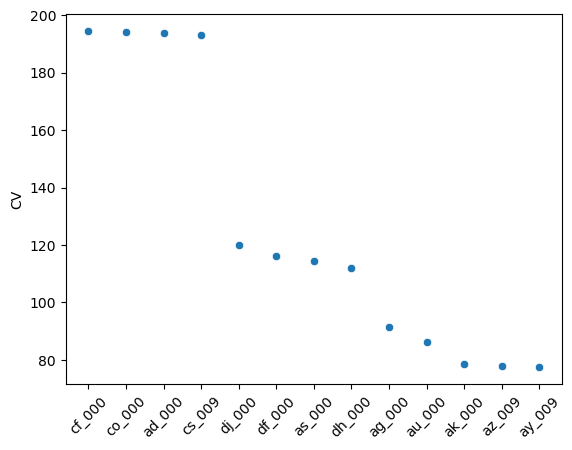

In [12]:
sns.scatterplot(data=highest_CV)
plt.xticks(rotation=45)

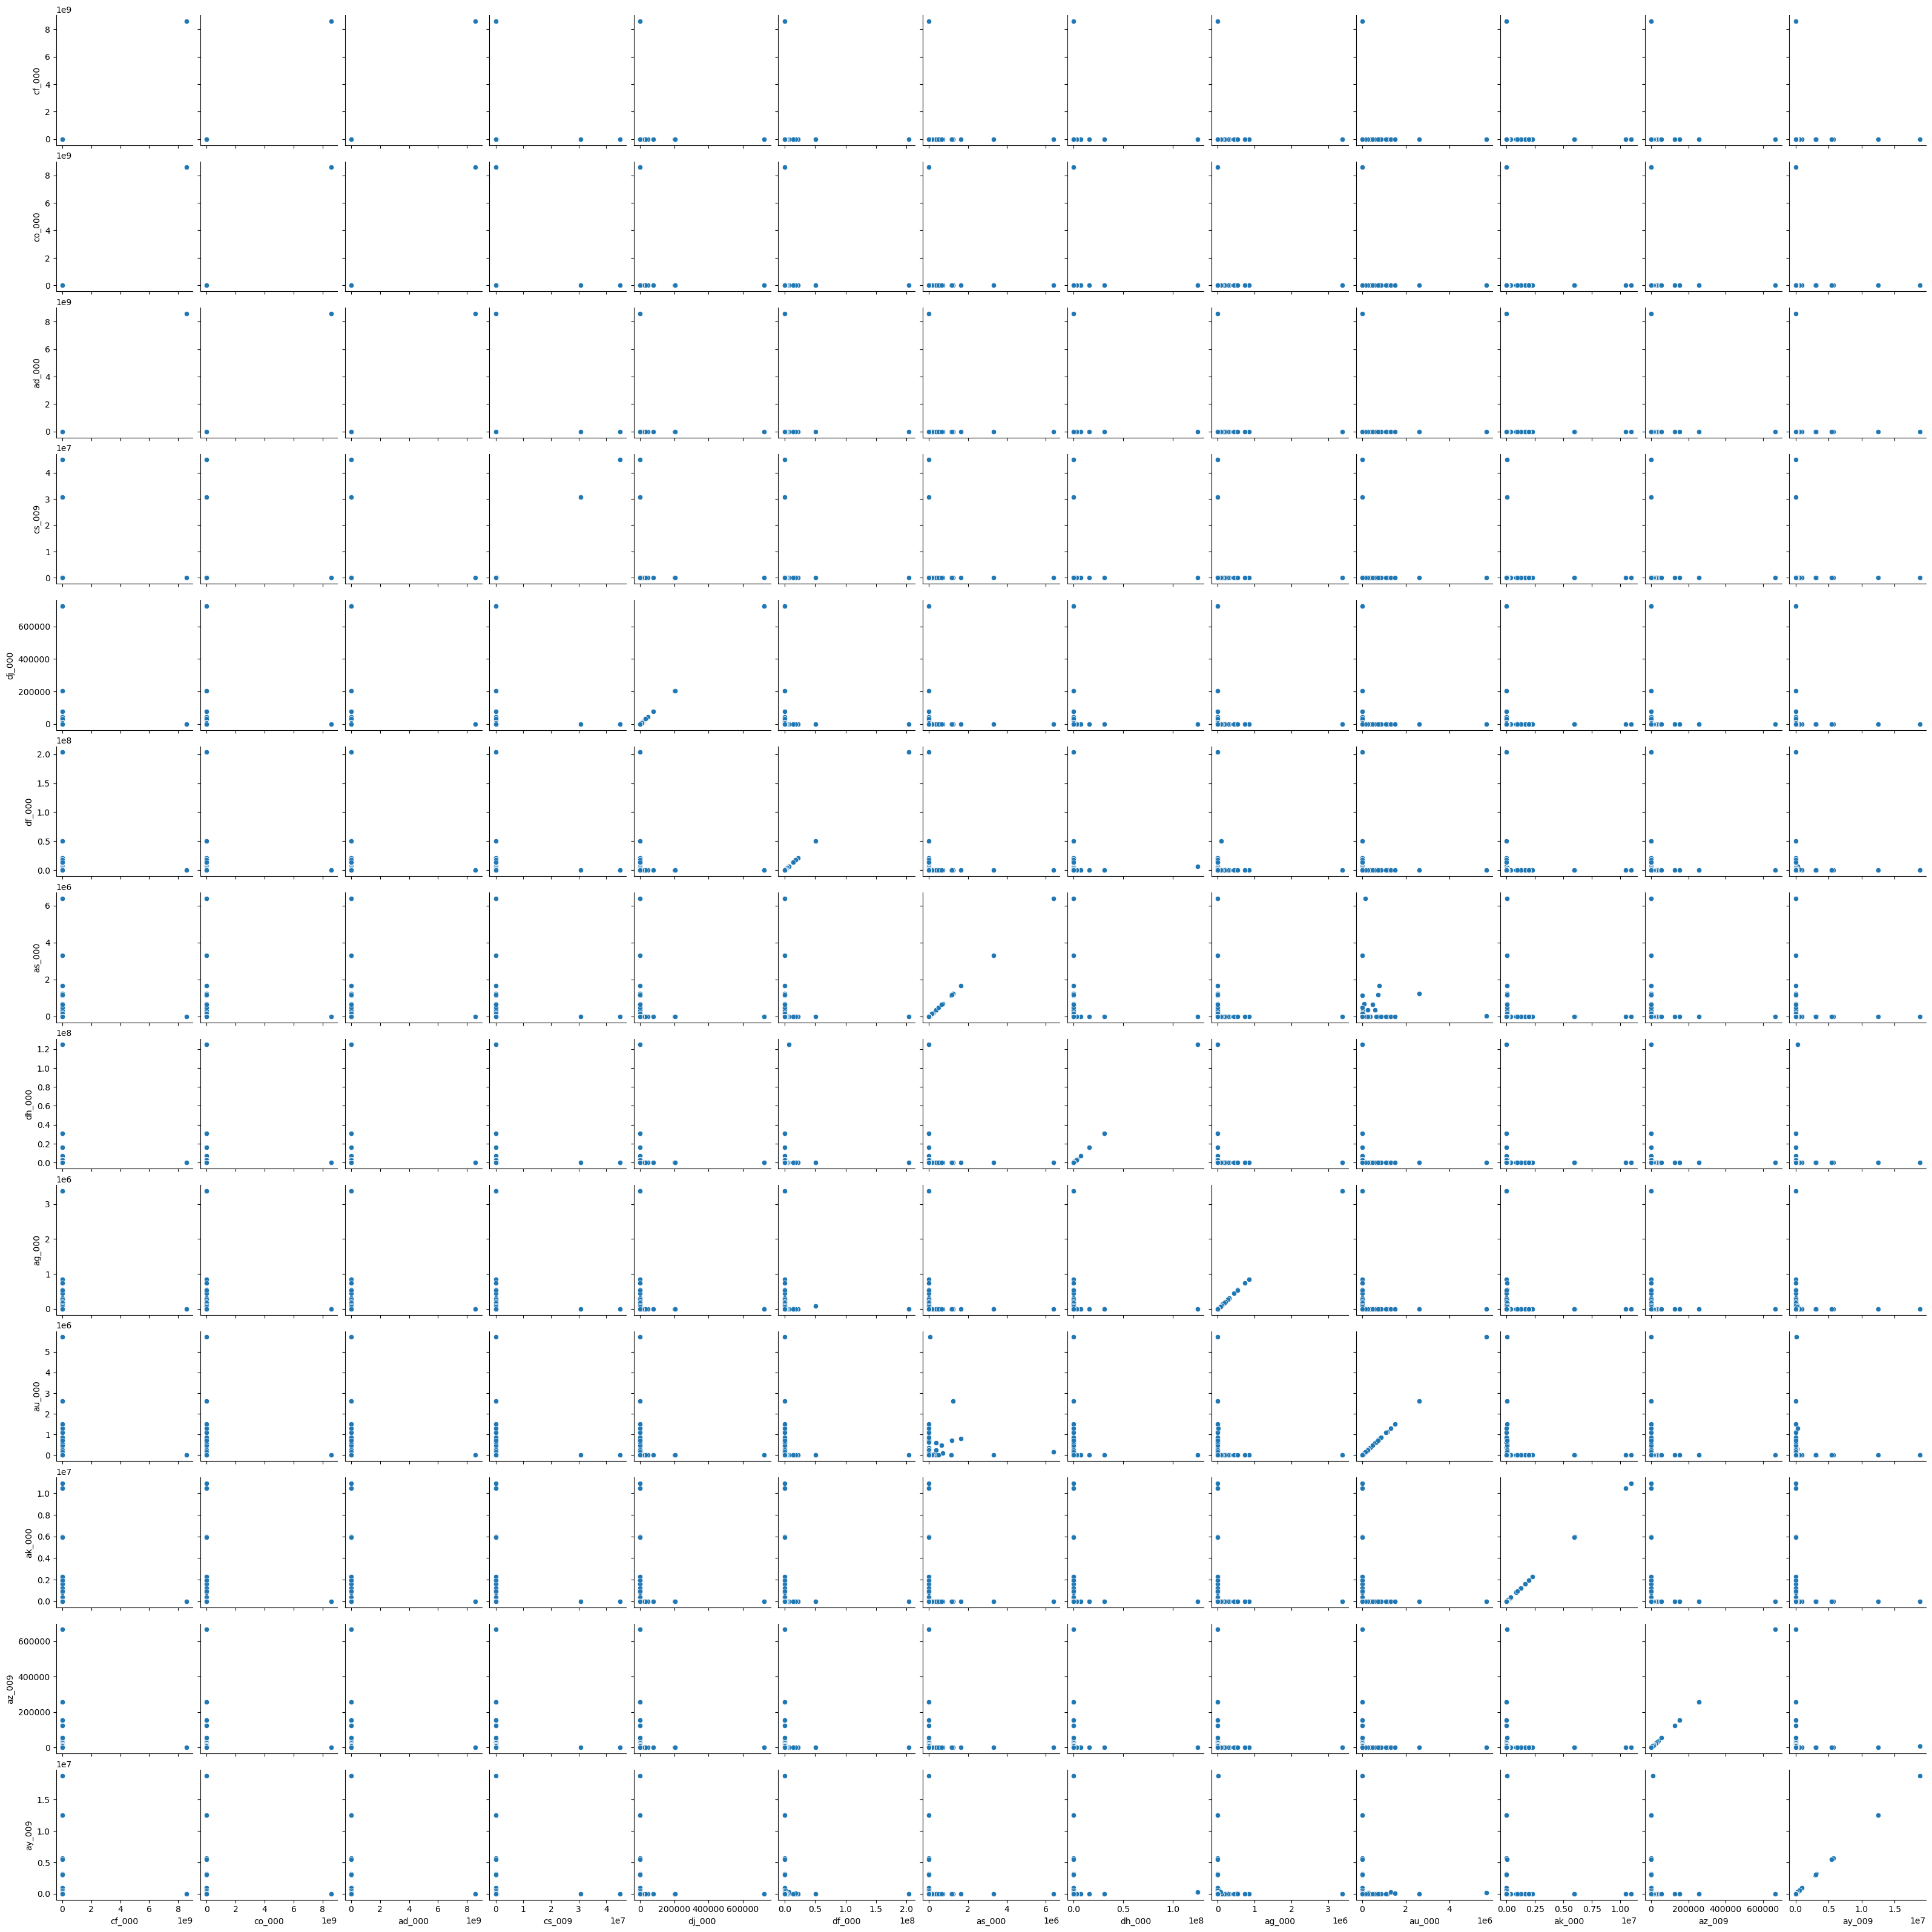

In [13]:
sns.pairplot(df[dict(highest_CV).keys()],diag_kind=None)

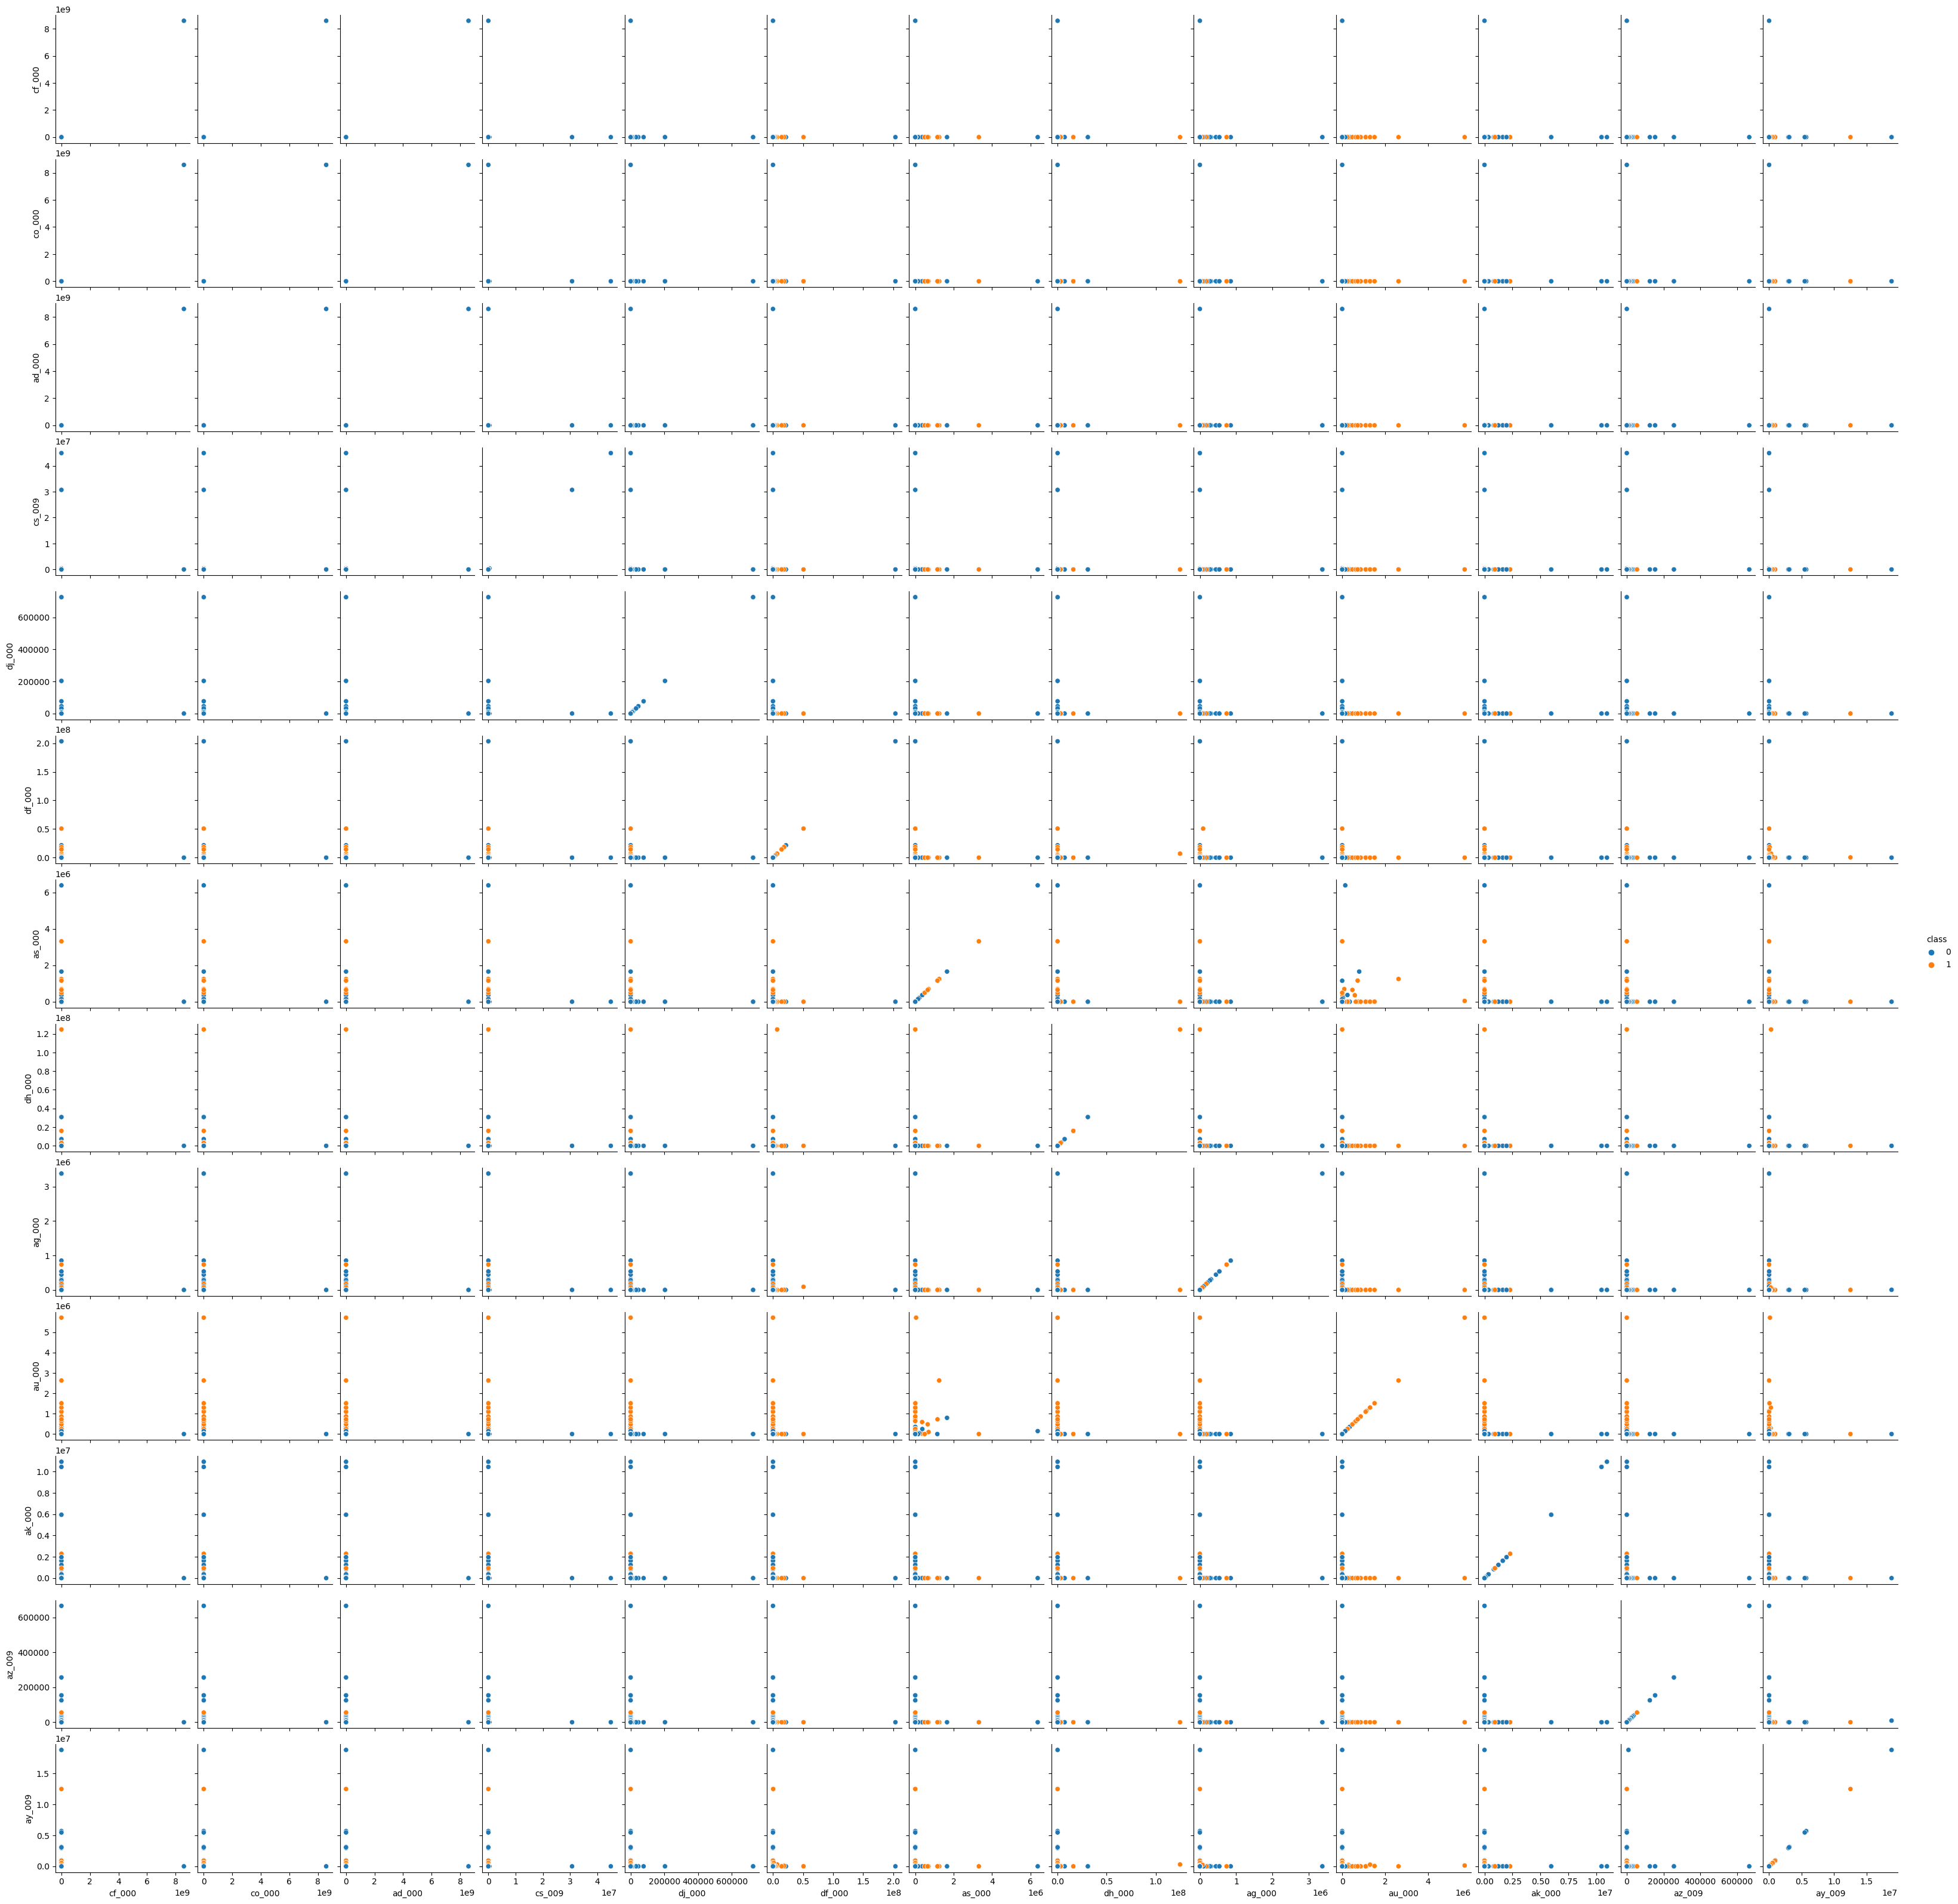

In [14]:
features = list(dict(highest_CV).keys())
features.append('class')
sns.pairplot(df[features], hue="class",diag_kind=None)

Box plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'cf_000'),
  Text(1, 0, 'co_000'),
  Text(2, 0, 'ad_000'),
  Text(3, 0, 'cs_009'),
  Text(4, 0, 'dj_000'),
  Text(5, 0, 'df_000'),
  Text(6, 0, 'as_000'),
  Text(7, 0, 'dh_000'),
  Text(8, 0, 'ag_000'),
  Text(9, 0, 'au_000'),
  Text(10, 0, 'ak_000'),
  Text(11, 0, 'az_009'),
  Text(12, 0, 'ay_009')])

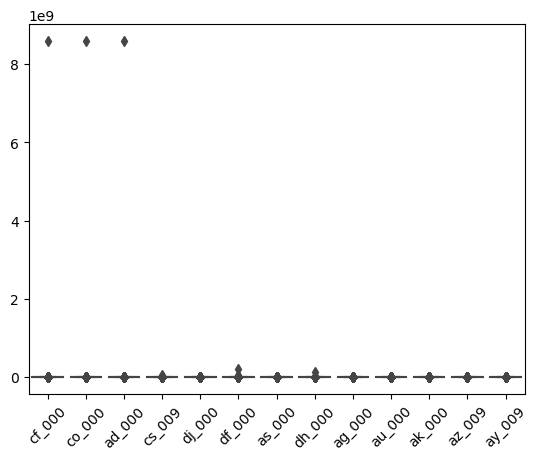

In [15]:
sns.boxplot(data=df[dict(highest_CV).keys()])
plt.xticks(rotation=45)

The data range is too broad, so we can see the box is condensed at the bottom when plotted. Therefore, I zoom in the y-axis range to (0,15000) to see the box at the bottom.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'cf_000'),
  Text(1, 0, 'co_000'),
  Text(2, 0, 'ad_000'),
  Text(3, 0, 'cs_009'),
  Text(4, 0, 'dj_000'),
  Text(5, 0, 'df_000'),
  Text(6, 0, 'as_000'),
  Text(7, 0, 'dh_000'),
  Text(8, 0, 'ag_000'),
  Text(9, 0, 'au_000'),
  Text(10, 0, 'ak_000'),
  Text(11, 0, 'az_009'),
  Text(12, 0, 'ay_009')])

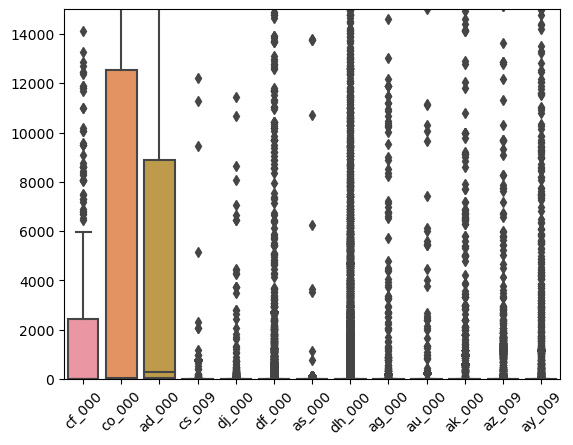

In [16]:
sns.boxplot(data=df[dict(highest_CV).keys()])
plt.ylim(0, 15000)
plt.xticks(rotation=45)

#### Can you draw a conclusions...?
We can see some features whose y-axis has been extended with an extensive range, so there are some apparent outliers in those features, but most of the data points are centered in the bottom right corner. On top of that, some features are even centered on the two sides. We can only see two dots in the pair plot, but it means most of the data is centralized in those two clusters, which means it might be easy for the model to classify them.

#### (v) Is this data set imbalanced?

In [17]:
df['class'].value_counts()

class
0    74625
1     1375
Name: count, dtype: int64

Yes, it is imbalanced. Since the number of the negative class is about 74625, the number of the positive class is only 1375. The number of the positive class is far away less than the negative class.

### (c) Train a random forest

#### As I mentioned in 1.(b), at the training phase(1.(c)~), I will replace missing values in both the training and test datasets with the mean values computed from the training data. This ensures that the imputation process is consistent between the training and test datasets and that the test dataset remains entirely unseen during the imputation step.

In [18]:
avg_list = list()

for i in train_df.columns.drop(['class']):
    column_sum = 0.0
    notNA_length = 0
    do_column = train_df[i]
    for j in range(len(do_column)):
        if(do_column[j] != 'na'):
            column_sum += float(do_column[j])
            notNA_length += 1
    avg = column_sum/notNA_length
    train_df[i] = train_df[i].replace(['na'],[avg]) #train set imputation
    test_df[i] = test_df[i].replace(['na'],[avg]) #test set imputation
    
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,551389.799347,582871.32293,604886.613264,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,37.06298,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0.713189,0,190620.639314,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,463710.833594,513147.820297,551389.799347,582871.32293,604886.613264,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,190221.810984,91.520415,0.000443,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,190515.566938,0,3646660,37.06298,6160,796,164860,350066,272956,1837600,301242,9148,22,0,749.091271,1222.960989,1928824.893358,351510.236231,274.179338,19374.290483,7.393791,13.416652,2200752.208997,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,0.713189,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,399603.167571,463710.833594,513147.820297,551389.799347,582871.32293,604886.613264,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,37.06298,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,

In [19]:
train_features = train_df.drop(['class'],axis=1).astype(float)
train_df = pd.concat([train_df['class'], train_features],axis=1)

test_features = test_df.drop(['class'],axis=1).astype(float)
test_df = pd.concat([test_df['class'], test_features],axis=1)

In [20]:
# positive=1; negative=0
train_df['class'] = train_df['class'].replace(['neg', 'pos'],[0,1])
test_df['class'] = test_df['class'].replace(['neg', 'pos'],[0,1])

In [21]:
X_train = train_df.drop(['class'],axis=1) 
X_test = test_df.drop(['class'],axis=1)
y_train = train_df['class']
y_test = test_df['class']

In [22]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(oob_score=True,random_state=42)

RFmodel.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

#### Confusion matrix

Training set

Training Confusion Matrix:
 [[59000     0]
 [    1   999]]


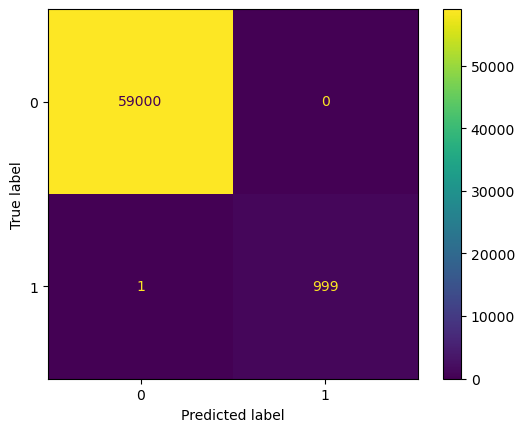

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = RFmodel.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:\n", train_cm)

train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
train_disp.plot()
plt.show()

Test set

Test Confusion Matrix:
 [[15609    16]
 [  107   268]]


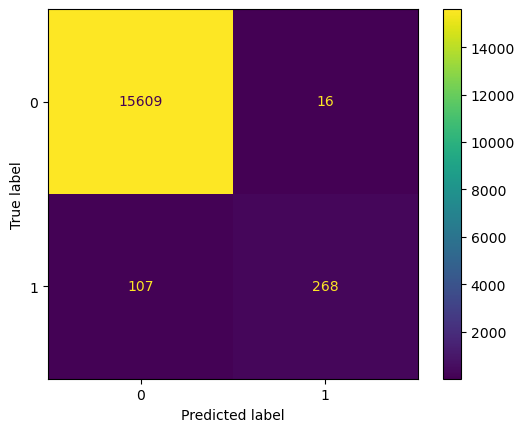

In [24]:
y_test_pred = RFmodel.predict(X_test)
test_cm = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:\n", test_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.show()

#### ROC & AUC

Training set

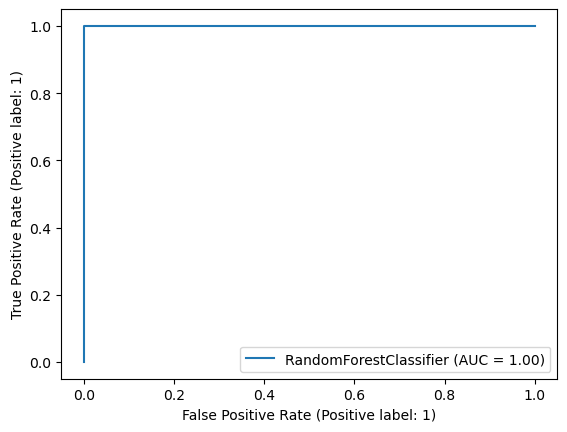

In [25]:
from sklearn import metrics
from sklearn.metrics import auc,roc_curve,roc_auc_score, RocCurveDisplay

RF_disp = RocCurveDisplay.from_estimator(RFmodel, X_train, y_train)
plt.show()

In [26]:
# Get the training AUC
fpr_train, tpr_train, _ = roc_curve(y_train, RFmodel.predict_proba(X_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

print("Training AUC:", roc_auc_train)

Training AUC: 1.0


Test set

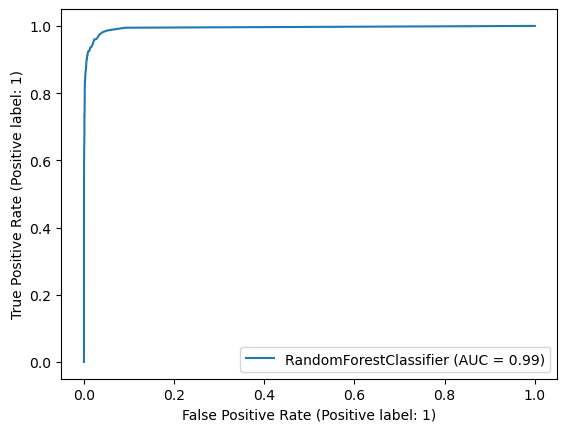

In [27]:
RF_disp = RocCurveDisplay.from_estimator(RFmodel, X_test, y_test)
plt.show()

In [28]:
# Get the test AUC
fpr_test, tpr_test, _ = roc_curve(y_test, RFmodel.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)


print("Test AUC:", roc_auc_test)

Test AUC: 0.9941632853333333


#### Misclassification for training and test sets

In [29]:
print('Misclassification rate for training set:', 1-RFmodel.score(X_train, y_train))
print('Miscalssification rate for test set:', 1-RFmodel.score(X_test, y_test))

Misclassification rate for training set: 1.666666666666483e-05
Miscalssification rate for test set: 0.007687499999999958


#### Out of Bag error estimate

In [30]:
#oob_RFmodel.oob_score_
oob_error = 1 - RFmodel.oob_score_
print("The Out of Bag error estimate is:",oob_error)

The Out of Bag error estimate is: 0.00605


The test error of the random forest is 0.007687499999999958.<br>
The Out of Bag error estimate is 0.00605.

The Out of Bag error estimate is lower than the test error.

### (d) Research class imbalance in random forest

**Sample Weighting/Class Weights:** Assign weights to classes inversely proportional to their frequencies in the training data. 

**Bootstrap Class Weighting:** In a traditional Random Forest model, each tree is trained on a bootstrap sample of the original data set, where samples may be repeated or left out. In Random Forest Bootstrap Class Weighting, additional weights based on class distribution are given to samples during bootstrapping, focusing more on minority class samples for improved classification accuracy on minority class instances.

**Random Forest with Undersampling:** Similar to bagging, random undersampling can be combined with random forests for improved performance on imbalanced datasets. By randomly removing some instances from the majority class in each bootstrap sample, we can balance the class distribution. This allows random forest classifiers to focus more on the minority class during training, potentially improving their ability to learn effectively from minority class instances and classify them correctly.

**SMOTE(Synthetic Minority Over-sampling Technique):** This technique generates synthetic examples for the minority class based on its feature space. This helps to alleviate the class imbalance problem without the loss of information or the risk of overfitting.

I implement the Sample Weighting here.
Since in training set, there are 1000 belongs to the positive class and 59000 belongs to the negative class, so we set the weight of class0:class1 = 1:59 to make the weight even.

In [31]:
# Set class weights
class_weight = {0: 1, 1: 59}

SW_RFmodel = RandomForestClassifier(oob_score=True,random_state=42,class_weight=class_weight)

sample_weight = np.array([class_weight[i] for i in y_train])

SW_RFmodel.fit(X_train, y_train, sample_weight=sample_weight)

RandomForestClassifier(class_weight={0: 1, 1: 59}, oob_score=True,
                       random_state=42)

#### Confusion Matrix
Training set

Training Confusion Matrix:
 [[59000     0]
 [    1   999]]


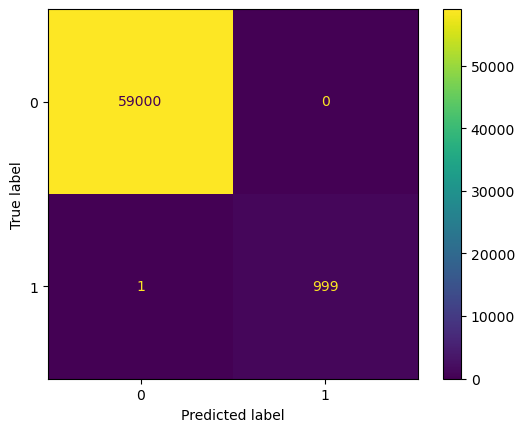

In [32]:
y_train_pred = SW_RFmodel.predict(X_train)
SW_train_cm = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:\n", SW_train_cm)

SW_train_disp = ConfusionMatrixDisplay(confusion_matrix=SW_train_cm)
SW_train_disp.plot()
plt.show()

Test set

Test Confusion Matrix:
 [[15612    13]
 [  187   188]]


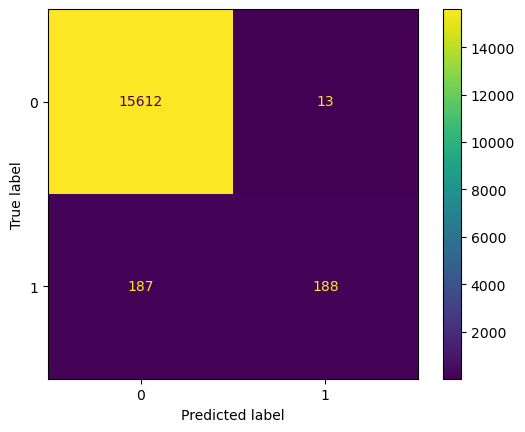

In [33]:
y_test_pred = SW_RFmodel.predict(X_test)
SW_test_cm = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:\n", SW_test_cm)

SW_test_disp = ConfusionMatrixDisplay(confusion_matrix=SW_test_cm)
SW_test_disp.plot()
plt.show()

#### ROC & AUC
Training set

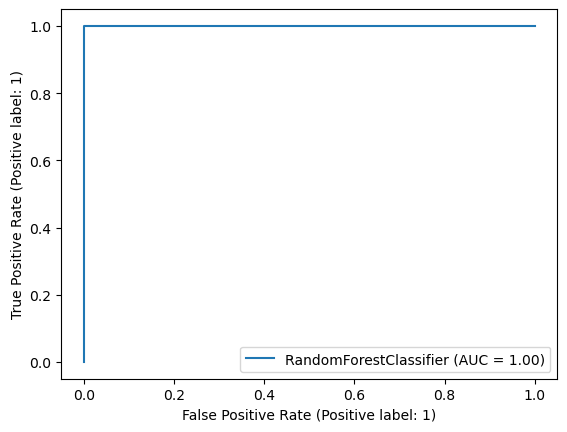

In [34]:
SW_RF_disp = RocCurveDisplay.from_estimator(SW_RFmodel, X_train, y_train)
plt.show()

In [35]:
# Get the training AUC
fpr_train, tpr_train, _ = roc_curve(y_train, SW_RFmodel.predict_proba(X_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

print("Training AUC:", roc_auc_train)

Training AUC: 1.0


Test set

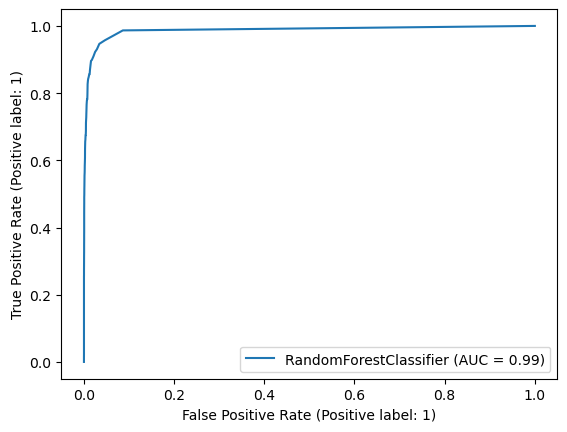

In [36]:
SW_RF_disp = RocCurveDisplay.from_estimator(SW_RFmodel, X_test, y_test)
plt.show()

In [37]:
# Get the test AUC
fpr_test, tpr_test, _ = roc_curve(y_test, SW_RFmodel.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)


print("Test AUC:", roc_auc_test)

Test AUC: 0.9869129386666667


#### Misclassification

In [38]:
print('Misclassification rate for training set:', 1-SW_RFmodel.score(X_train, y_train))
print('Miscalssification rate for test set:', 1-SW_RFmodel.score(X_test, y_test))

Misclassification rate for training set: 1.666666666666483e-05
Miscalssification rate for test set: 0.012499999999999956


#### Out of Bag error estimate

In [39]:
oob_error = 1 - SW_RFmodel.oob_score_
print("The Out of Bag error estimate is:",oob_error)

The Out of Bag error estimate is: 0.009033333333333338


#### Compare with 1c

The test error of the random forest is 0.007687499999999958.<br>
The Out of Bag error estimate is 0.00605.<br>
Miscalssification rate for test set: 0.007687499999999958.<br>
Test AUC: 0.9941632853333333

The test error after compensate for class imbalance is: 0.012499999999999956.<br>
The Out of Bag error estimate after compensate for class imbalance is: 0.009033333333333338.<br>
Miscalssification rate for test set: 0.012499999999999956.<br>
Test AUC: 0.9869129386666667.

**=> After compensating for class imbalance, the all evaluate error value, including test error and OOB error estimate become higher instead.**

### (e) XGBoost and Model Trees

In [40]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
# alhpa: L1 regularization term on weights. Increasing this value will make model more conservative.
alphas = [0, 0.001, 0.01, 0.1, 1, 10]#np.logspace(-4, 4, 100) #[0, 0.001, 0.01, 0.1, 1, 10]
param_grid = {'alpha': alphas} # Values of alpha to search through

XGBmodel = xgb.XGBClassifier(objective='binary:logistic')

grid_search = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, cv=5, scoring='roc_auc')

# Train XGBoost models
grid_search.fit(X_train, y_train)

# Evaluate model performance
print("Best alpha:", grid_search.best_params_['alpha'])
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_test)

# Select the best alpha
best_alpha = grid_search.best_params_['alpha']

# Train final model
best_XGBmodel = xgb.XGBClassifier(objective='binary:logistic',alpha=best_alpha)
best_XGBmodel.fit(X_train, y_train)

# Get the training error
y_train_pred = best_XGBmodel.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
fpr_train, tpr_train, _ = roc_curve(y_train, best_XGBmodel.predict_proba(X_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)


# Get the test error
y_test_pred = best_XGBmodel.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, best_XGBmodel.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

print("Training Confusion Matrix:\n", train_conf_matrix)
print("Training AUC:", roc_auc_train)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test AUC:", roc_auc_test)

Best alpha: 0.01
Training Confusion Matrix:
 [[59000     0]
 [    1   999]]
Training AUC: 0.999999847457627
Test Confusion Matrix:
 [[15609    16]
 [   87   288]]
Test AUC: 0.9958959786666667


#### Confusion Matrix
Training set

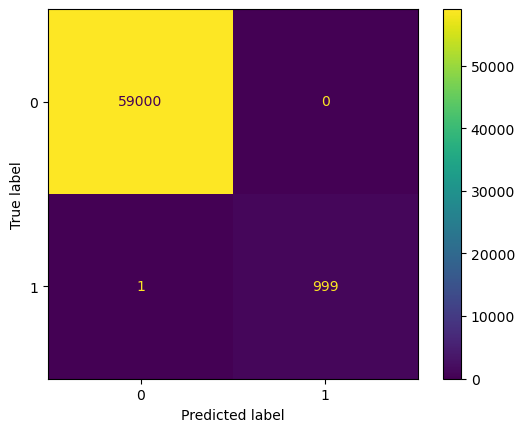

In [41]:
XGB_train_disp = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix)
XGB_train_disp.plot()
plt.show()

Test set

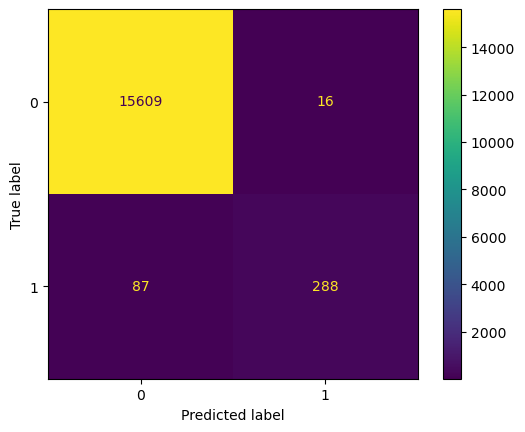

In [42]:
XGB_test_disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix)
XGB_test_disp.plot()
plt.show()

#### ROC & AUC
Training set

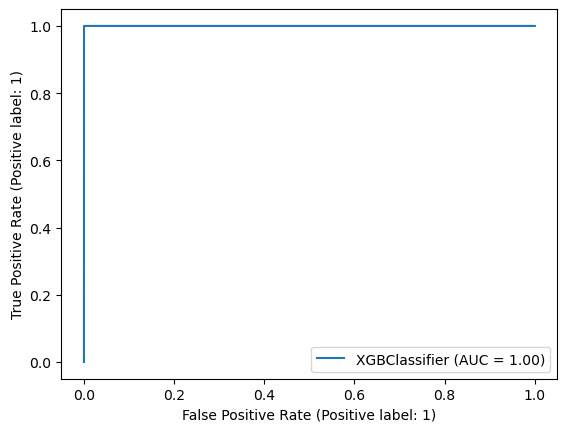

In [43]:
XGB_train_disp = RocCurveDisplay.from_estimator(best_XGBmodel, X_train, y_train)
plt.show()

In [44]:
print("Training AUC:", roc_auc_train)

Training AUC: 0.999999847457627


Test set

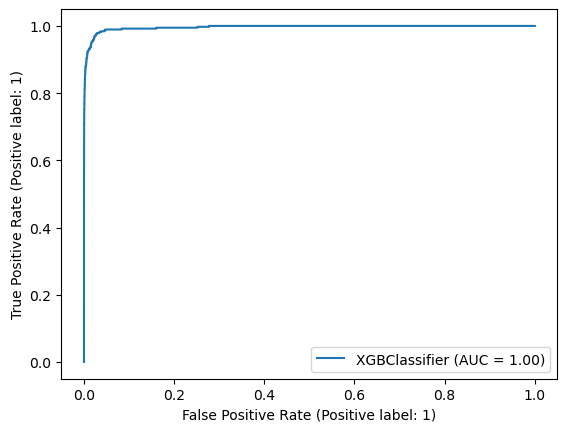

In [45]:
XGB_test_disp = RocCurveDisplay.from_estimator(best_XGBmodel, X_test, y_test)
plt.show()

In [46]:
print("Test AUC:", roc_auc_test)

Test AUC: 0.9958959786666667


### (f) Use SMOTE to pre-process your data

In [47]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

alphas = [0, 0.001, 0.01, 0.1, 1, 10]#np.logspace(-4, 4, 100) #[0, 0.001, 0.01, 0.1, 1, 10]
param_grid = {'alpha': alphas} # Values of alpha to search through

SM_XGBmodel = xgb.XGBClassifier(objective='binary:logistic')

grid_search = GridSearchCV(estimator=SM_XGBmodel, param_grid=param_grid, cv=5, scoring='roc_auc')

# Train XGBoost models
grid_search.fit(X_train_res, y_train_res)

# Evaluate model performance
print("Best alpha:", grid_search.best_params_['alpha'])
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_test)

# Select the best alpha
best_alpha = grid_search.best_params_['alpha']

# Train final model
best_SM_XGBmodel = xgb.XGBClassifier(objective='binary:logistic',alpha=best_alpha)
best_SM_XGBmodel.fit(X_train_res, y_train_res)

# Get the training error
y_train_pred = best_SM_XGBmodel.predict(X_train_res)
train_conf_matrix = confusion_matrix(y_train_res, y_train_pred)
fpr_train, tpr_train, _ = roc_curve(y_train_res, best_SM_XGBmodel.predict_proba(X_train_res)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)


# Get the test error
y_test_pred = best_SM_XGBmodel.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, best_SM_XGBmodel.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

print("Training Confusion Matrix:\n", train_conf_matrix)
print("Training AUC:", roc_auc_train)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test AUC:", roc_auc_test)

Best alpha: 0.1
Training Confusion Matrix:
 [[59000     0]
 [    1 58999]]
Training AUC: 1.0
Test Confusion Matrix:
 [[15582    43]
 [   64   311]]
Test AUC: 0.991789568


In [48]:
#Train and Test error rate
print("The training error rate of SMOTE model:", 1-best_SM_XGBmodel.score(X_train_res, y_train_res))
print("The test error rate of SMOTE model:", 1-best_SM_XGBmodel.score(X_test, y_test))

The training error rate of SMOTE model: 8.47457627117798e-06
The test error rate of SMOTE model: 0.006687499999999957


#### Confusion matrix
Training set

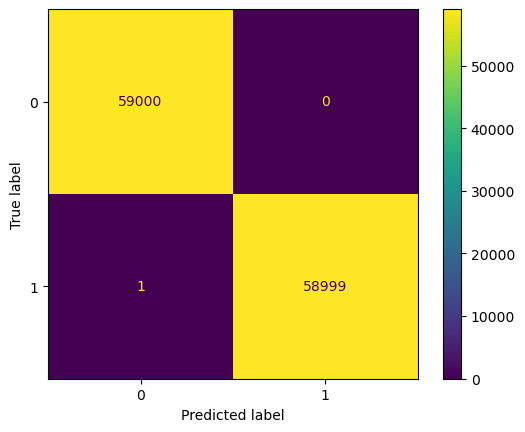

In [49]:
XGB_train_disp = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix)
XGB_train_disp.plot()
plt.show()

Test set

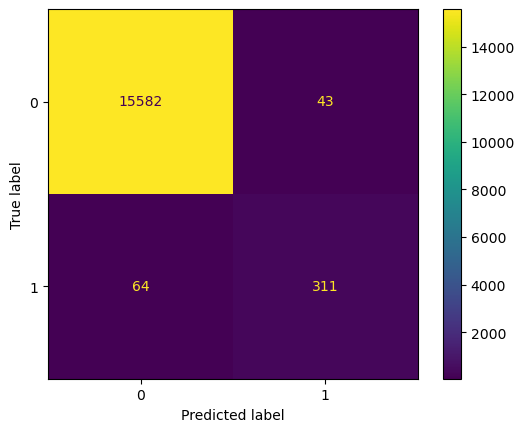

In [50]:
XGB_test_disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix)
XGB_test_disp.plot()
plt.show()

### ROC & AUC
Training set

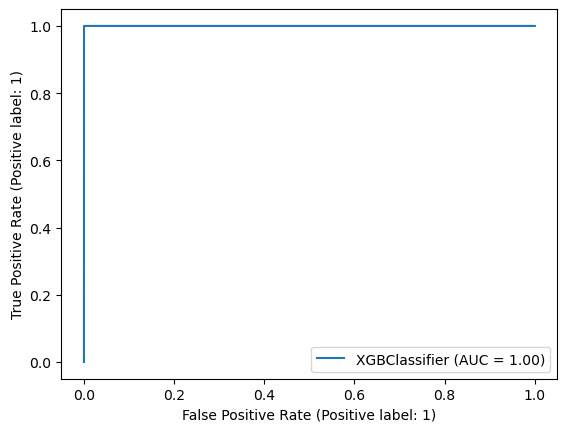

In [51]:
XGB_train_disp = RocCurveDisplay.from_estimator(best_XGBmodel, X_train, y_train)
plt.show()

In [52]:
print("Training AUC:", roc_auc_train)

Training AUC: 1.0


Test set

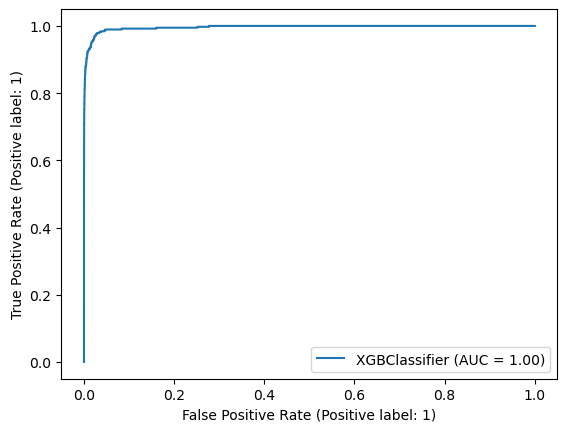

In [53]:
XGB_test_disp = RocCurveDisplay.from_estimator(best_XGBmodel, X_test, y_test)
plt.show()

In [54]:
print("Test AUC:", roc_auc_test)

Test AUC: 0.991789568


#### Compare the uncompensated case with SMOTE case
**Uncompensated case:**<br>
The test error of the random forest is 0.007687499999999958.<br>
Test AUC: 0.9941632853333333

**SMOTE:**<br>
The test error: 0.006687499999999957.<br>
Test AUC: 0.991789568.

**=> After SMOTE, the test error has become lower, and the AUC is also lower, which means maybe the training phase is "less overfitting" than the random forest model. The model has better prediction because we reduced the influence of the imbalanced data.**

## 2. ISLR 6.6.3

(a) **iv.Steadily decrease**<br>
As we increase s from 0, the restriction of the βj coefficients become less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more flexible which provokes a steady decrease in the training RSS. That means the model would try so hard to fit the training set and become overfitting.

(b) **ii. Decrease initially, and then eventually start increasing in a U shape.**<br>
Same as reason in (a), as we increase s from 0, the model is least flexible and restricted model at first and end with the least squares and flexible model. Therefore, the model test RSS would start to decrease and touch the best spot which perform well in both training and test data. After the sweet spot, the model seems to overfit the training model and the test RSS start to increase.

(c) **iii. Steadily increase**<br>
As mentioned, the model start from the strict one become more and more flexible. The variance is the measure represents the flexibility so it would steadily increase.

(d) **iv. Steadily decrease**<br>
Becuase of the Var-Bias tradeoff, when the variance steadily increases, the bias would steadily decrease relatively. Or because the more flexible the model is, the model become less bias.

(e) **v. Remain constant**<br>
The irreducible error is act of god, it would always remain no matter how the model change. It is independent to the model.

## 3. ISLR 6.6.5

**(a)
Ridge regression optimization problem:**<br>
According the question and assuming $x_{11}=x_{12}=x1, x_{21}=x_{22}=x_2,$ <br>
<center>$(y_i-\hat\beta_1x_1-\hat\beta_2x_1)^2+(y_2-\hat\beta_1x_2-\hat\beta_2x_2)^2+\lambda(\hat\beta_1^2+\hat\beta_2^2)$</center>


**(b)**
By taking the derivatives of the above expression with respect to $\hat\beta_1$ and $\hat\beta_2$, and setting them equal to 0, we obtain:
<center> $\frac{\partial}{\partial \hat\beta_1} = 0 \Rightarrow \frac{\partial}{\partial \hat\beta_1} = (2\hat\beta_1x_{11}^2-2x_{11}y_1+2\hat\beta_2x_{11}x_{12})+(2\hat\beta_1x_{21}^2-2x_{21}y_2+2\hat\beta_2x_{21}x_{22})+2\lambda\hat\beta_1 = 0$</center>
<br>and<br>
<center> $\frac{\partial}{\partial \hat\beta_2} = 0 \Rightarrow \frac{\partial}{\partial \hat\beta_2} = (2\hat\beta_2x_{11}^2-2x_{11}y_1+2\hat\beta_1x_{11}x_{12})+(2\hat\beta_2x_{21}^2-2x_{21}y_2+2\hat\beta_1x_{21}x_{22})+2\lambda\hat\beta_2 = 0$</center>

<br>with some algebra calculation we can get:<br>
<center> $\lambda\hat\beta_1 = x_1y_1+x_2y_2-2\hat\beta_1(x_1^2+x_2^2)-2\hat\beta_2(x_1^2+x_2^2)$ </center>
<br>and<br>
<center> $\lambda\hat\beta_2 = x_1y_1+x_2y_2-2\hat\beta_1(x_1^2+x_2^2)-2\hat\beta_2(x_1^2+x_2^2)$ </center>
<br>
which satisfy $\hat\beta_1=\hat\beta_2$

**(c)
Lasso optimization problem:**<br>
<center>$(y_i-\hat\beta_1x_1-\hat\beta_2x_1)^2+(y_2-\hat\beta_1x_2-\hat\beta_2x_2)^2+\lambda(|\hat\beta_1|+|\hat\beta_2|)$</center>

**(d)**<br>
The alternate form of Lasso:
$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2\text{ subject to }|\hat{\beta}_1| + |\hat{\beta}_2|\le s.$

<br>Geometrically the lasso is the form of a diamond centered at the origin of the plane $(\hat\beta_1,\hat\beta_2)$ which intersects the axes at a distance s from the origin. By using the setting of this problem $(x_{11}=x_{12}=x1, x_{21}=x_{22}=x2, x_1+x_2=0$ and $y_1+y_2=0)$, we have to minimize the expression:
<center>$2[y_1 - (\hat\beta_1 + \hat\beta_2)x_1]^2 \ge 0$</center>
This has a simple solution: $\hat\beta_1+\hat\beta_2 = \frac{y_1}{x_1}$. Geometrically, this is a line parallel to the edge of the diamond of the constraints
Other solutions to the lasso optimization problem are contours of the function $[y_1−(\hat\beta_1+\hat\beta_2)x_1]^2$ that intersects the diamond of the constraints. So, the entire edge $(\hat\beta_1+\hat\beta_2) = s$ (as is the edge $(\hat\beta_1+\hat\beta_2) = −s$
) is a potential solution to the lasso optimization problem. Thus, the lasso optimization problem has a whole set of solutions instead of a unique one :
<br>
<center>$\{(\hat\beta_1,\hat{\beta}_2) : \hat\beta_1 + \hat\beta_2 = s\text{ with }\hat\beta_1,\hat\beta_2\ge 0\text{ and }\hat\beta_1 + \hat\beta_2 = -s\text{ with }\hat\beta_1,\hat\beta_2\le 0\}$</center>



## 4. ISLR 8.4.5

**1.If using classification based on the majority vote:**
(G stands for green class, R stands for red class)
|Probabilty|Class|
|---|---|
|0.1|G|
|0.15|G|
|0.2|G|
|0.2|G|
|0.55|R|
|0.6|R|
|0.6|R|
|0.65|R|
|0.7|R|
|0.75|R|

6 for R(red) and 4 for G(green), so with the majority vote, we would choose the common one, which is the red class.
**=> Red**



**2.If using classification based on the average probability:**
We calculate the average probability of 10 estimates:
$Avg P = (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10= 4.5/10 = 0.45$
<br>We classify X as green.
**=> Green**

## 5. ISLR 9.7.3

### (a) Sketch the observations

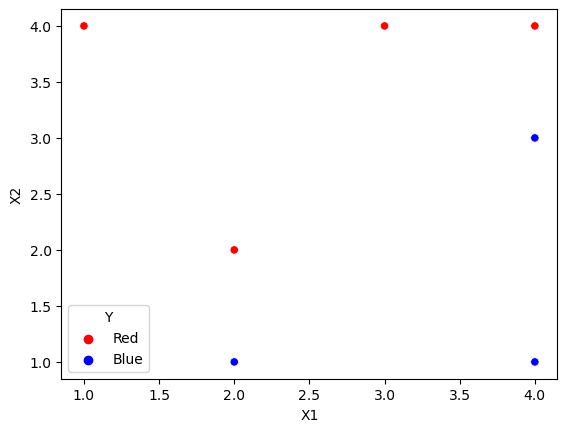

In [116]:
X1 = [3, 2, 4, 1, 2, 4, 4]
X2 = [4, 2, 4, 4, 1, 3, 1]
y = ["Red", "Red", "Red", "Red", "Blue", "Blue", "Blue"]

obs = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':y})

ax = sns.scatterplot(data=obs,x='X1',y='X2',hue='Y', palette=['red','blue'])

### (b) Sketch the optimal seperating hyperplane

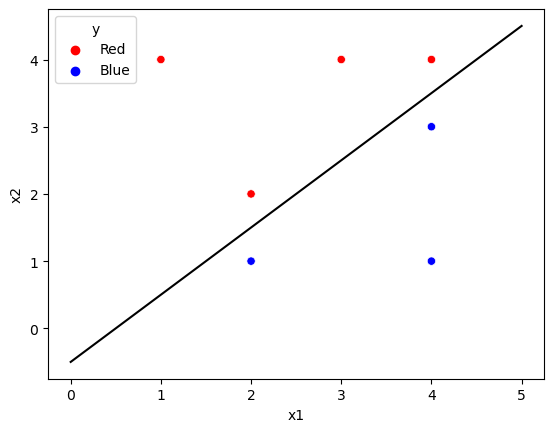

In [117]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ["Red", "Red", "Red", "Red", "Blue", "Blue", "Blue"]

obs = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
ax = sns.scatterplot(data=obs,x='x1',y='x2',hue='y', palette=['red','blue'])

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

ax.plot(X1, X2,color='black')

The equation for this hyperplane is: $-0.5+X_1-X_2 = 0$

### (c)

Classify to Red if: $-0.5+X_1-X_2 < 0$.<br>
Classify to Blue if: $-0.5+X_1-X_2 > 0$

### (d)

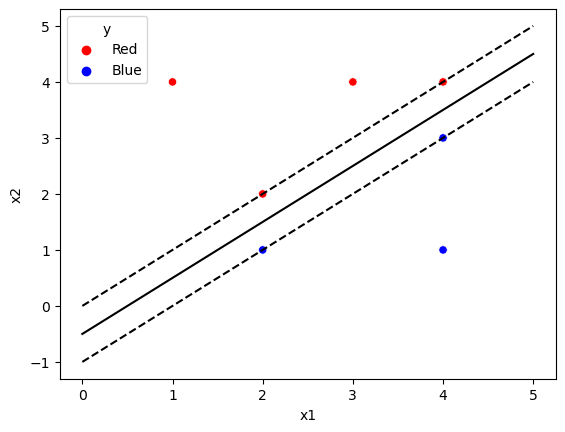

In [118]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

margin_upper = X1
margin_lower = X1 -1

obs = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = sns.scatterplot(x='x1', y='x2', hue='y', data=obs, palette=['red','blue'])
ax.plot(X1, X2, color='black')
ax.plot(X1, margin_upper, linestyle='--', color='black')
ax.plot(X1, margin_lower, linestyle='--', color='black')

### (e)
The support vectors are the observations that lie on the dashed margins.

### (f)

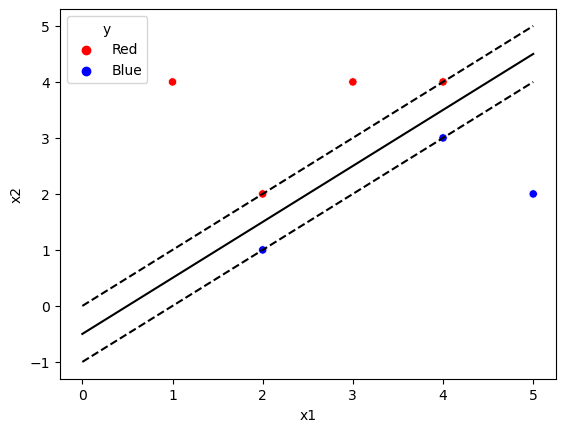

In [119]:
x1 = [3, 2, 4, 1, 2, 4, 5]
x2 = [4, 2, 4, 4, 1, 3, 2]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

margin_upper = X1
margin_lower = X1 -1

obs = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
ax = sns.scatterplot(x='x1', y='x2', hue='y', data=obs, palette=['red','blue'])
ax.plot(X1, X2, color='black')
ax.plot(X1, margin_upper, linestyle='--', color='black')
ax.plot(X1, margin_lower, linestyle='--', color='black')

I move the seventh observation from (4,1) to (5,2), which is x1+1 and x2+1. This does not effect the maximal margin hyperplane. However, if I move the observation to much to let it cross the margin it would effect the maximal margin hyperplane.

### (g)

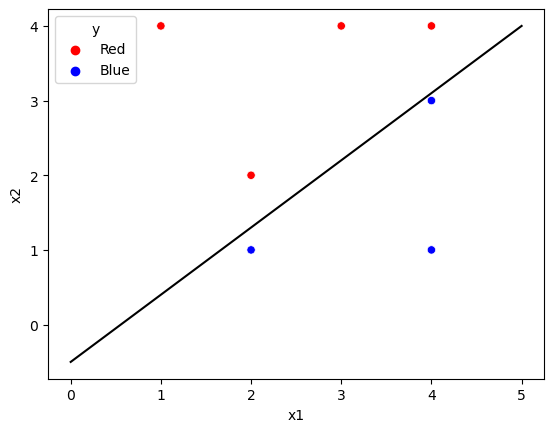

In [120]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = 0.9*X1 - 0.5

obs = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = sns.scatterplot(x='x1', y='x2', hue='y', data=obs, palette=['red','blue'])
ax.plot(X1, X2, color='black')

The equation for this hyperplane is: $-0.5+0.9*X_1-X_2 = 0$

### (h)

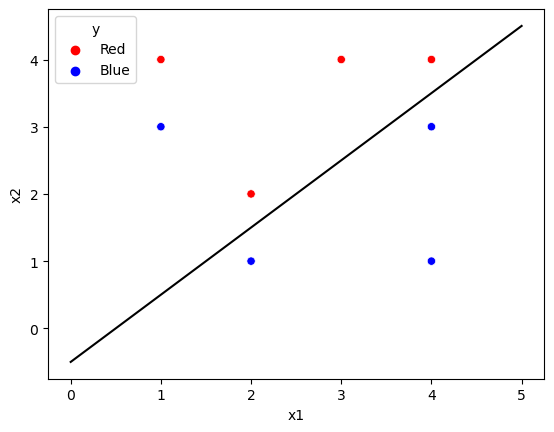

In [121]:
# Add an observation point (1,3,Blue)
x1 = [3, 2, 4, 1, 2, 4, 4,1]
x2 = [4, 2, 4, 4, 1, 3, 1,3]
y = ["Red", "Red", "Red", "Red", "Blue", "Blue", "Blue","Blue"]

obs = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
ax = sns.scatterplot(data=obs,x='x1',y='x2',hue='y', palette=['red','blue'])

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

ax.plot(X1, X2,color='black')

I add an additional observation (1,3,Blue) on the plot so that the two classes are no longer separable by a hyperplane.